In [1]:
import pyrap.tables as pt
import sys
from astropy.time import Time
from astropy import units as u

from losoto import h5parm
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline


Documentation of Losoto pyhton module:

http://revoltek.github.io/losoto/losoto.html 


DPPP DDE calibtaion outputs instrument.h5 solution file. 
The file contains one Solset 'sol000', and two soltabs 'amplitude000', 'phase000'



False

In [3]:
# MSFILE="/opt/Archive/202008122000/20200813T6415-6495/SB319-20200813T6415-6495.ms/dde_instrument.h5"

SB="SB281"
OBS="202005100330"
SLICE="2020-05-10T06:00:00-06:03:10"


sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                       address="sol000/amplitude000")

# time, freq, ant, pol
print np.shape(sol_tab.getValues()[0])
print sol_tab.getValues()[1]


(94, 3, 576, 2, 4)
{'ant': array(['A12_0', 'A12_1', 'A12_2', 'A12_3', 'A12_4', 'A12_5', 'A12_6',
       'A12_7', 'A12_8', 'A12_9', 'A12_10', 'A12_11', 'A12_12', 'A12_13',
       'A12_14', 'A12_15', 'A12_16', 'A12_17', 'A12_18', 'A12_19',
       'A12_20', 'A12_21', 'A12_22', 'A12_23', 'A12_24', 'A12_25',
       'A12_26', 'A12_27', 'A12_28', 'A12_29', 'A12_30', 'A12_31',
       'A12_32', 'A12_33', 'A12_34', 'A12_35', 'A12_36', 'A12_37',
       'A12_38', 'A12_39', 'A12_40', 'A12_41', 'A12_42', 'A12_43',
       'A12_44', 'A12_45', 'A12_46', 'A12_47', 'A12_48', 'A12_49',
       'A12_50', 'A12_51', 'A12_52', 'A12_53', 'A12_54', 'A12_55',
       'A12_56', 'A12_57', 'A12_58', 'A12_59', 'A12_60', 'A12_61',
       'A12_62', 'A12_63', 'A12_64', 'A12_65', 'A12_66', 'A12_67',
       'A12_68', 'A12_69', 'A12_70', 'A12_71', 'A12_72', 'A12_73',
       'A12_74', 'A12_75', 'A12_76', 'A12_77', 'A12_78', 'A12_79',
       'A12_80', 'A12_81', 'A12_82', 'A12_83', 'A12_84', 'A12_85',
       'A12_86', 'A12_87'

In [3]:
sol_file = h5parm.h5parm("/opt/Archive/202008122000/SB319-20200813T6415-6495.ms/instrument.h5")


In [12]:
solset = sol_file.getSolset('sol000')

In [13]:
solset.getSoltabNames()

['amplitude000', 'phase000']

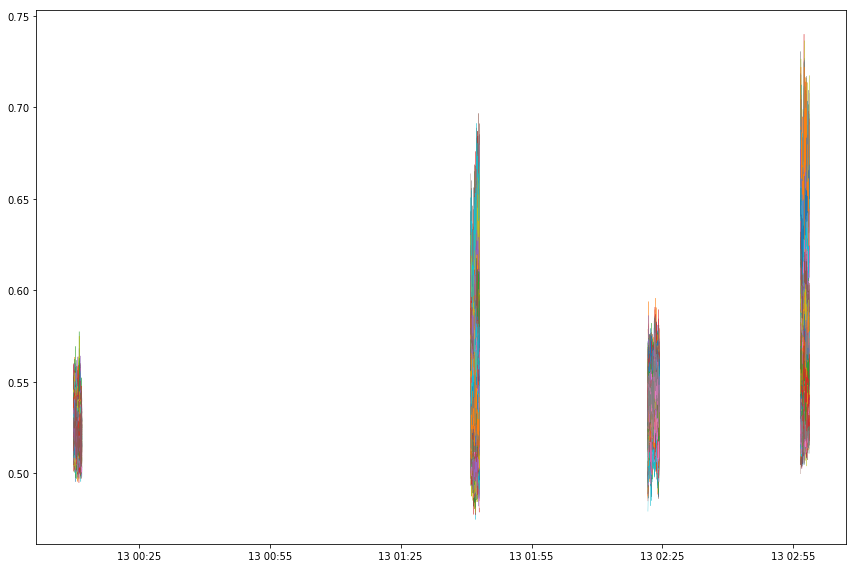

In [15]:
OBS = ["20200813T2490-2550", "20200813T5204-5265", 
       "20200813T6415-6495", "20200813T7457-7518","20200812T212413-212713"]

plt.figure(figsize=(12,8))
for _obs in OBS:

    sol_tab = h5parm.openSoltab("/opt/Archive/202008122000/{}_all/SB255-{}.ms/dde_instrument.h5".format(_obs,_obs),
                           address="sol000/amplitude000")

    soldata = sol_tab.getValues()[0]
    soltime = sol_tab.getValues()[1]["time"]
#     np.shape(soldata)



#     plt.figure(figsize=(10, 8))
    # plt.subplot(projection="polar")


    for ant in np.arange(0,576):

        _x = plt.plot(Time(soltime*u.s, format='mjd').datetime, 
                      np.mean(soldata[:,:,ant,0], axis=1), lw=0.3)
#         if np.mean(soldata[:,:,ant,0], axis=1) < 0.5:
            

plt.tight_layout()
# plt.ylim(0,0.1)
plt.show()




/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


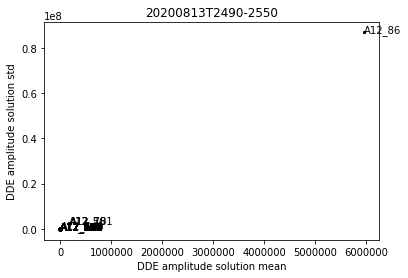

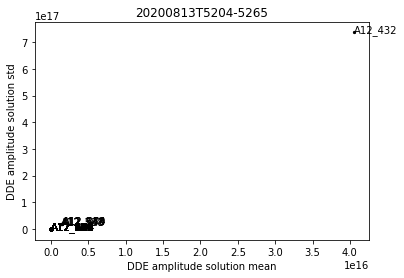

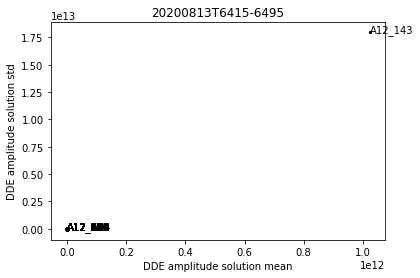

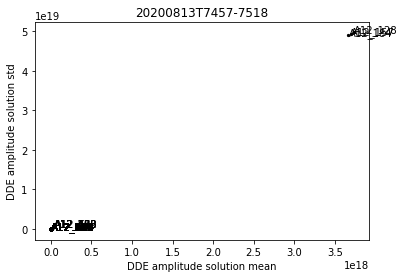

Exception: Missing file /opt/Archive/202008122000/20200812T212413-212713_all/SB166-20200812T212413-212713.ms/dde_instrument.h5.

In [79]:
OBS = ["20200813T2490-2550", "20200813T5204-5265", 
       "20200813T6415-6495", "20200813T7457-7518","20200812T212413-212713"]

# time, freq, ant, dir, pol
# (80, 3, 576, 2, 4)
for _obs in OBS:

    sol_tab = h5parm.openSoltab("/opt/Archive/202008122000/{}_all/SB166-{}.ms/dde_instrument.h5".format(_obs,_obs),
                           address="sol000/amplitude000")


    soldata = sol_tab.getValues()[0]
    plt.figure()
    plt.title(_obs)
    for ant in np.arange(0,576):
        
        
        plt.scatter(np.nanmean(soldata[:,:,ant,0,(0,-1)]), 
                    np.nanstd(soldata[:,:,ant,0,(0,-1)]), c="k", s=5)
        
        
        if np.isfinite(np.nanmean(soldata[:,:,ant,0,(0,-1)])) \
        and np.isfinite(np.nanstd(soldata[:,:,ant,0,(0,-1)])):
            plt.text(np.nanmean(soldata[:,:,ant,0,(0,-1)]),
                     np.nanstd(soldata[:,:,ant,0,(0,-1)]),
                     sol_tab.getValues()[1]["ant"][ant])
        
        plt.xlabel("DDE amplitude solution mean")
        plt.ylabel("DDE amplitude solution std")
        
    plt.show()

True

1.0543215272235733 0.35857412181770004 A12_575


Text(1.05432,0.358574,'A12_575')

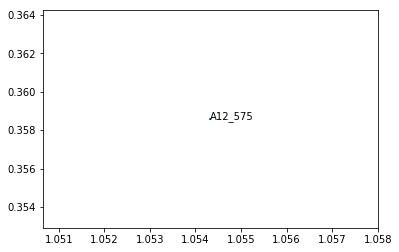

In [75]:
print np.nanmean(soldata[:,:,ant,0,(0,-1)]), np.nanstd(soldata[:,:,ant,0,(0,-1)]), sol_tab.getValues()[1]["ant"][ant]

plt.scatter(np.nanmean(soldata[:,:,ant,0,(0,-1)]),
         np.nanstd(soldata[:,:,ant,0,(0,-1)]), marker="+", s=5)

plt.text(np.nanmean(soldata[:,:,ant,0,(0,-1)]),
         np.nanstd(soldata[:,:,ant,0,(0,-1)]), 
         sol_tab.getValues()[1]["ant"][ant])

In [101]:
print np.shape(sol_tab.getValues()[0])
print sol_tab.getValues()[1]["pol"]
# print sol_tab.getValues()[1]

(94, 3, 576, 2, 4)
['XX' 'XY' 'YX' 'YY']


In [120]:
# SB="SB185"
# OBS="202008122000"
# SLICE="2020-08-12T21:24:13-21:27:13"


SB="SB281"
OBS="202005100330"
SLICE="2020-05-10T06:03:00-06:06:10"


sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/amplitude000")

In [4]:
all_SBs = ["SB281","SB284",
"SB287",
"SB291",
"SB294",
"SB298",
"SB301",
"SB304",
"SB308",
"SB311",
"SB315",
"SB318",
"SB321",
"SB325",
"SB328",
"SB332"]

meteor_SBs = ["SB166",
"SB185",
"SB186",
"SB194",
"SB195",
"SB212",
"SB213",
"SB235",
"SB236",
"SB237",
"SB238",
"SB256",
"SB319",
"SB320"]

In [130]:
np.shape(np.mean(sol_tab.getValues()[0], axis=(1,4))[:,:,0])

(94, 576)

In [136]:
np.shape(sol_tab.getValues()[0])

(94, 3, 576, 2, 4)

In [35]:
SB="SB287"
OBS="202006231032"
SLICE="2020-06-23T10:34:02-10:37:10"

print "/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE)


# for _SB in meteor_SBs:
sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
               address="sol000/phase000")

sol_tab.getValues()[0]

/opt/Archive/202006231032/2020-06-23T10:34:02-10:37:10_all/SB287-2020-06-23T10:34:02-10:37:10.ms/dde_instrument.h5


array([[[[[nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan]],

         [[nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan]],

         [[nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan]],

         ...,

         [[nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan]],

         [[nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan]],

         [[nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan]]],


        [[[nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan],
          [nan, nan, nan, nan]],

         [[nan, nan, nan, nan],
          [nan, nan, nan, nan],
         

In [3]:
sol_tab.getValues()[1]["dir"]

array(['[CasA_4_patch]', '[CygAGG]', '[TauAGG]', '[VirA_4_patch]'],
      dtype='|S128')

In [15]:
SB="SB321"
OBS="202005051300"
SLICE="2020-05-05T13:02:02-13:05:10"
print "/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE)


np.nanmean(sol_tab.getValues()[0], axis=(0,1,4))[:,4]

/opt/Archive/202005051300/2020-05-05T13:02:02-13:05:10_all/SB321-2020-05-05T13:02:02-13:05:10.ms/dde_instrument.h5


/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


IndexError: index 4 is out of bounds for axis 1 with size 4

<IPython.core.display.Javascript object>


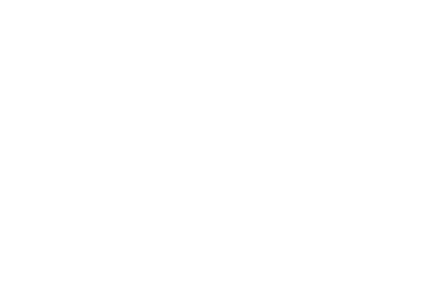

In [10]:
plt.clf()
plt.close()

/opt/Archive/202009240800/2020-09-24T11:15:00-11:18:10_all/SB166-2020-09-24T11:15:00-11:18:10.ms/dde_instrument.h5


<IPython.core.display.Javascript object>


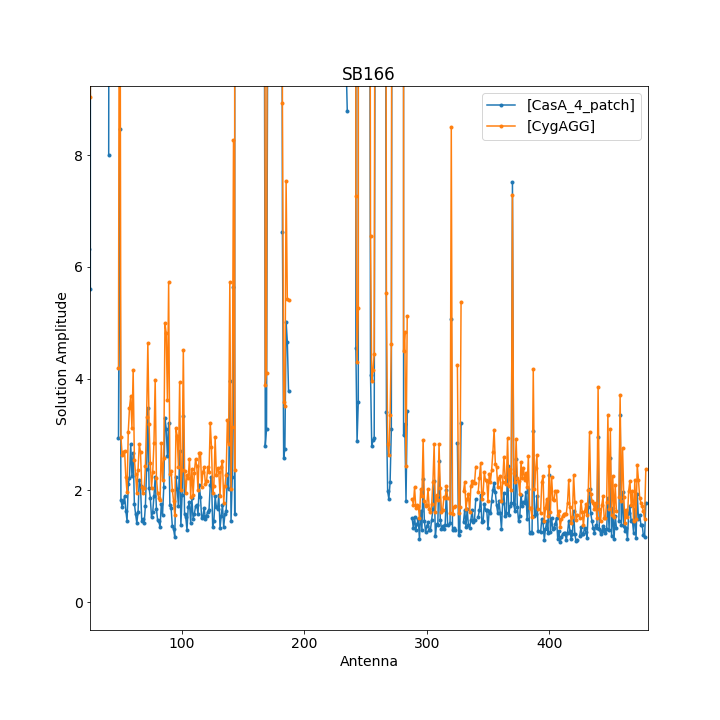

/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


/opt/Archive/202009240800/2020-09-24T11:15:00-11:18:10_all/SB320-2020-09-24T11:15:00-11:18:10.ms/dde_instrument.h5


<IPython.core.display.Javascript object>


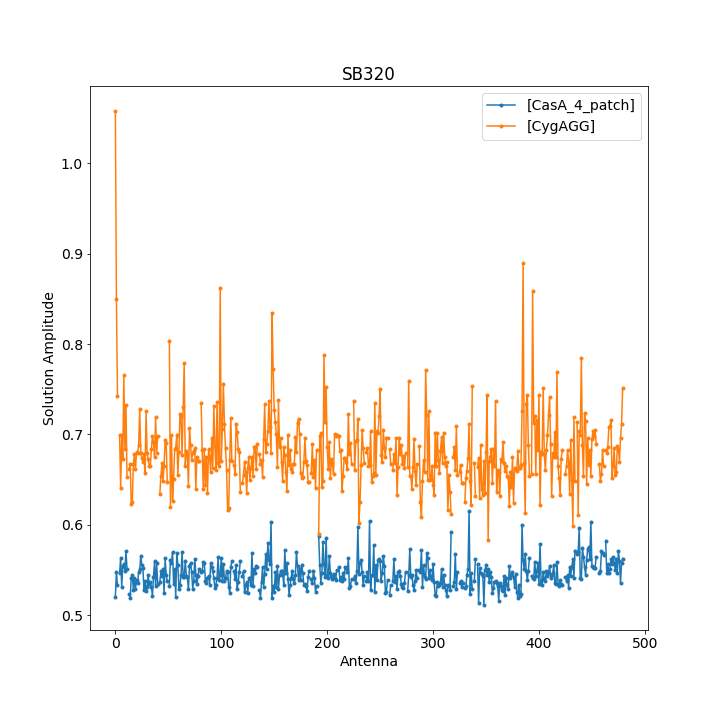

/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


In [14]:

% matplotlib notebook

SB="SB166"

OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"


print "/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE)


# for _SB in meteor_SBs:
sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
               address="sol000/amplitude000")

plt.figure(figsize=(10,10))
plt.title(SB)
for i in range(len(sol_tab.getValues()[1]["dir"])):
    plt.plot(np.nanmean(sol_tab.getValues()[0], axis=(0,1,4))[:,i],".-", label=sol_tab.getValues()[1]["dir"][i])

plt.ylabel("Solution Amplitude")
plt.xlabel("Antenna")
plt.legend()
# plt.show()


SB="SB320"
OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"


print "/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE)

# for _SB in meteor_SBs:
sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
               address="sol000/amplitude000")

plt.figure(figsize=(10,10))
plt.title(SB)
for i in range(len(sol_tab.getValues()[1]["dir"])):
    plt.plot(np.nanmean(sol_tab.getValues()[0], axis=(0,1,4))[:,i],".-", label=sol_tab.getValues()[1]["dir"][i])


plt.ylabel("Solution Amplitude")
plt.xlabel("Antenna")
plt.legend()
plt.show()

/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


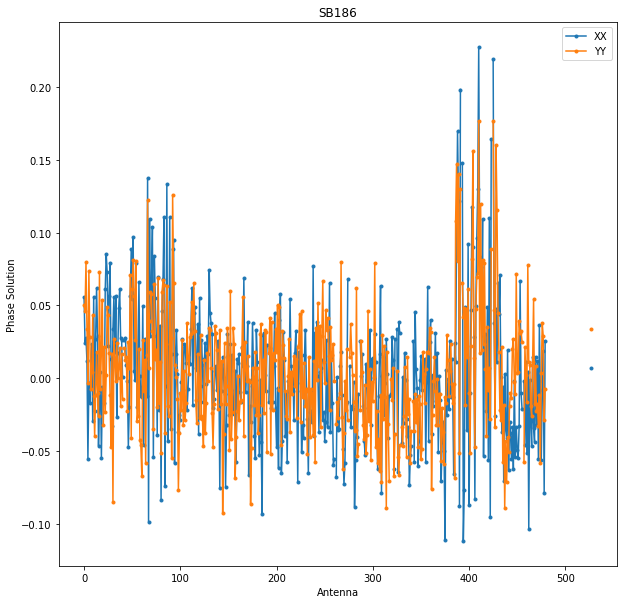

/home/mkuiack1/env/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


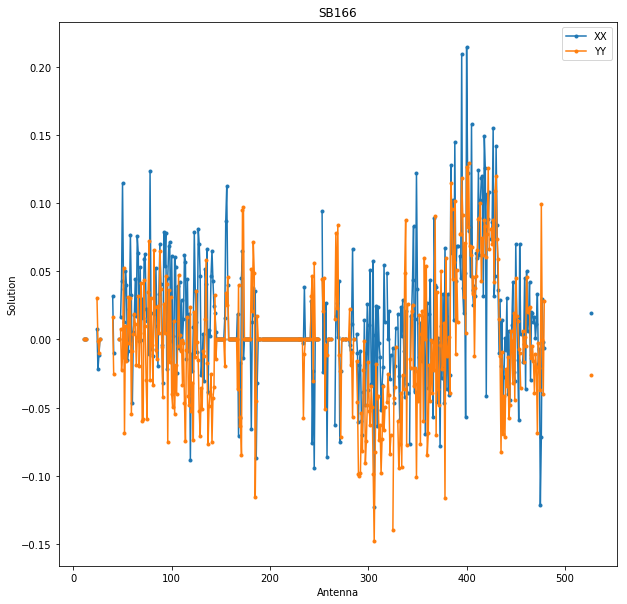

In [3]:
# % matplotlib inline


SB="SB186"
OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"

sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/phase000")

# for _SB in all_SBs:

plt.figure(figsize=(10,10))
plt.title(SB)
plt.plot(np.nanmean(sol_tab.getValues()[0], axis=(0,1,3))[:,0],".-", label=sol_tab.getValues()[1]["pol"][0])
# plt.plot(np.nanmean(sol_tab.getValues()[0], axis=(0,1,3))[:,1],".-", label=sol_tab.getValues()[1]["pol"][1])
# plt.plot(np.nanmean(sol_tab.getValues()[0], axis=(0,1,3))[:,2],".-", label=sol_tab.getValues()[1]["pol"][2])
plt.plot(np.nanmean(sol_tab.getValues()[0], axis=(0,1,3))[:,3],".-", label=sol_tab.getValues()[1]["pol"][3])
plt.ylabel("Phase Solution")
plt.xlabel("Antenna")
plt.legend()
plt.show()


SB="SB166"
OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"


sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/phase000")

# for _SB in all_SBs:

plt.figure(figsize=(10,10))
plt.title(SB)
plt.plot(np.nanmedian(sol_tab.getValues()[0], axis=(0,1,3))[:,0],".-", label=sol_tab.getValues()[1]["pol"][0])
# plt.plot(np.nanmedian(sol_tab.getValues()[0], axis=(0,1,3))[:,1],".-", label=sol_tab.getValues()[1]["pol"][1])
# plt.plot(np.nanmedian(sol_tab.getValues()[0], axis=(0,1,3))[:,2],".-", label=sol_tab.getValues()[1]["pol"][2])
plt.plot(np.nanmedian(sol_tab.getValues()[0], axis=(0,1,3))[:,3],".-", label=sol_tab.getValues()[1]["pol"][3])
plt.ylabel("Solution")
plt.xlabel("Antenna")
plt.legend()
plt.show()


In [64]:
np.shape(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,:])

/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


(95, 576, 4)

/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: Mean of empty slice


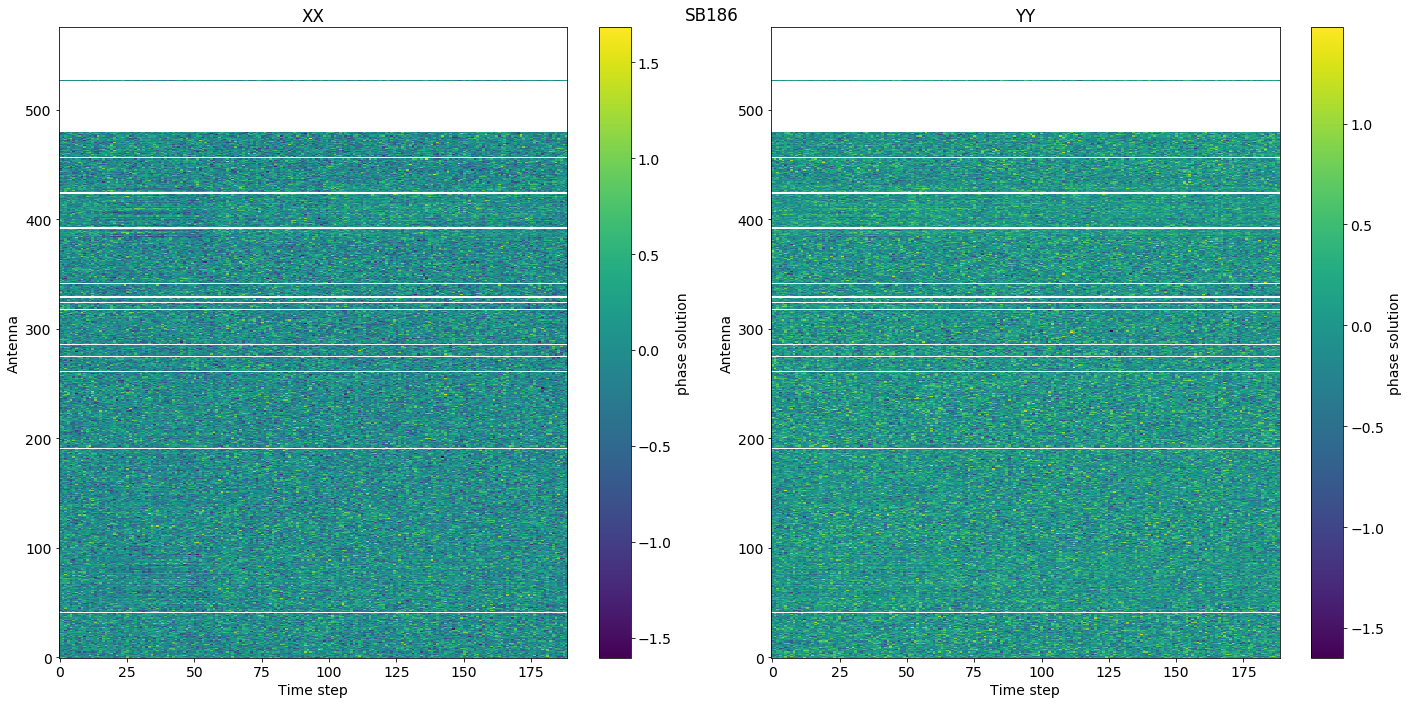

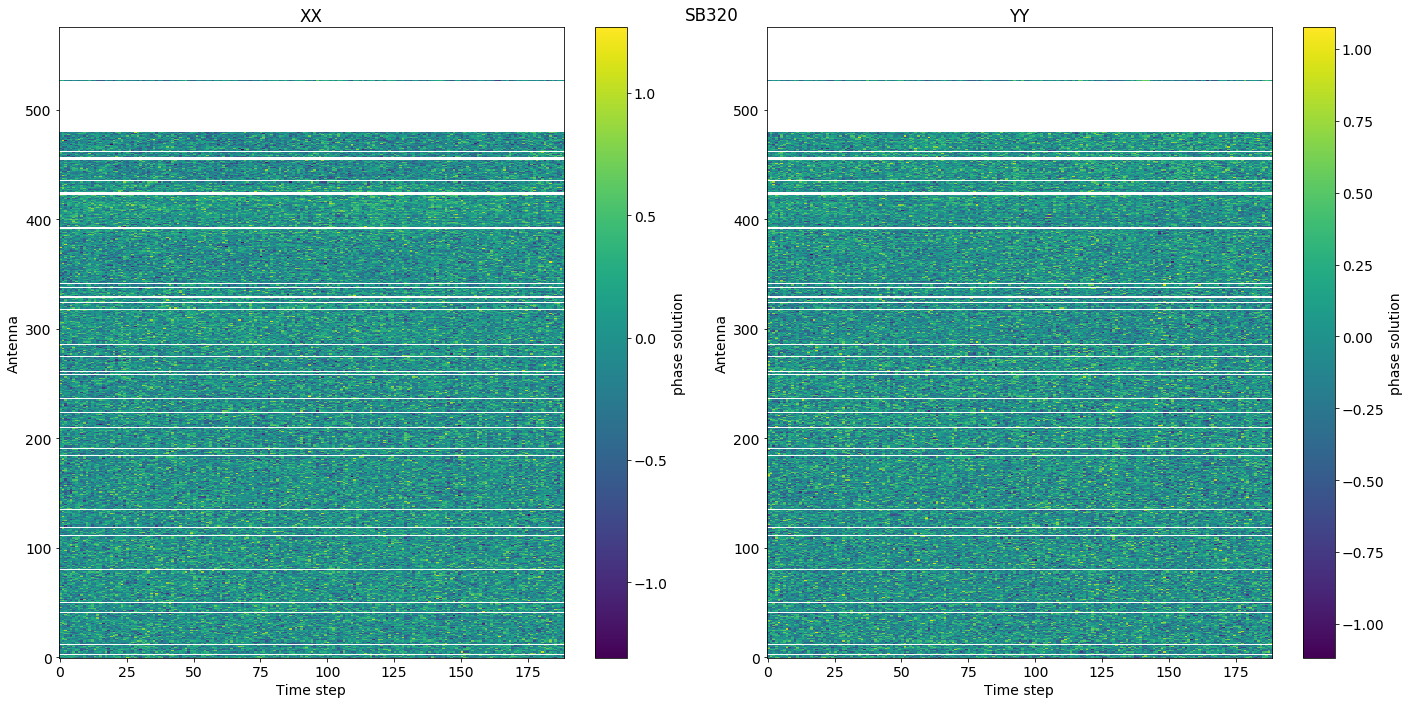

In [4]:
plt.rcParams["font.size"] = 14

SB="SB186"
OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"


sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/phase000")

plt.figure(figsize=(20,10))
plt.suptitle(SB)
plt.subplot(121)
plt.title(sol_tab.getValues()[1]["pol"][0])
plt.imshow(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,0].T, 
           aspect="auto", origin="lower")
plt.colorbar(label="phase solution")
plt.ylabel("Antenna")
plt.xlabel("Time step")
# plt.tight_layout()

# plt.figure(figsize=(10,10))
plt.subplot(122)
plt.title(sol_tab.getValues()[1]["pol"][3])
plt.imshow(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,3].T, 
           aspect="auto", origin="lower")
plt.colorbar(label="phase solution")
plt.ylabel("Antenna")
plt.xlabel("Time step")
plt.tight_layout()

SB="SB320"
OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"

sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/phase000")

plt.figure(figsize=(20,10))
plt.suptitle(SB)
plt.subplot(121)
plt.title(sol_tab.getValues()[1]["pol"][0])
plt.imshow(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,0].T, 
           aspect="auto", origin="lower")
plt.colorbar(label="phase solution")
plt.ylabel("Antenna")
plt.xlabel("Time step")
# plt.tight_layout()

# plt.figure(figsize=(10,10))
plt.subplot(122)
plt.title(sol_tab.getValues()[1]["pol"][3])
plt.imshow(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,3].T, 
           aspect="auto", origin="lower")
plt.colorbar(label="phase solution")
plt.ylabel("Antenna")
plt.xlabel("Time step")
plt.tight_layout()


In [94]:
sol_tab.getValues()[1]["time"]

60

/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: Mean of empty slice
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice


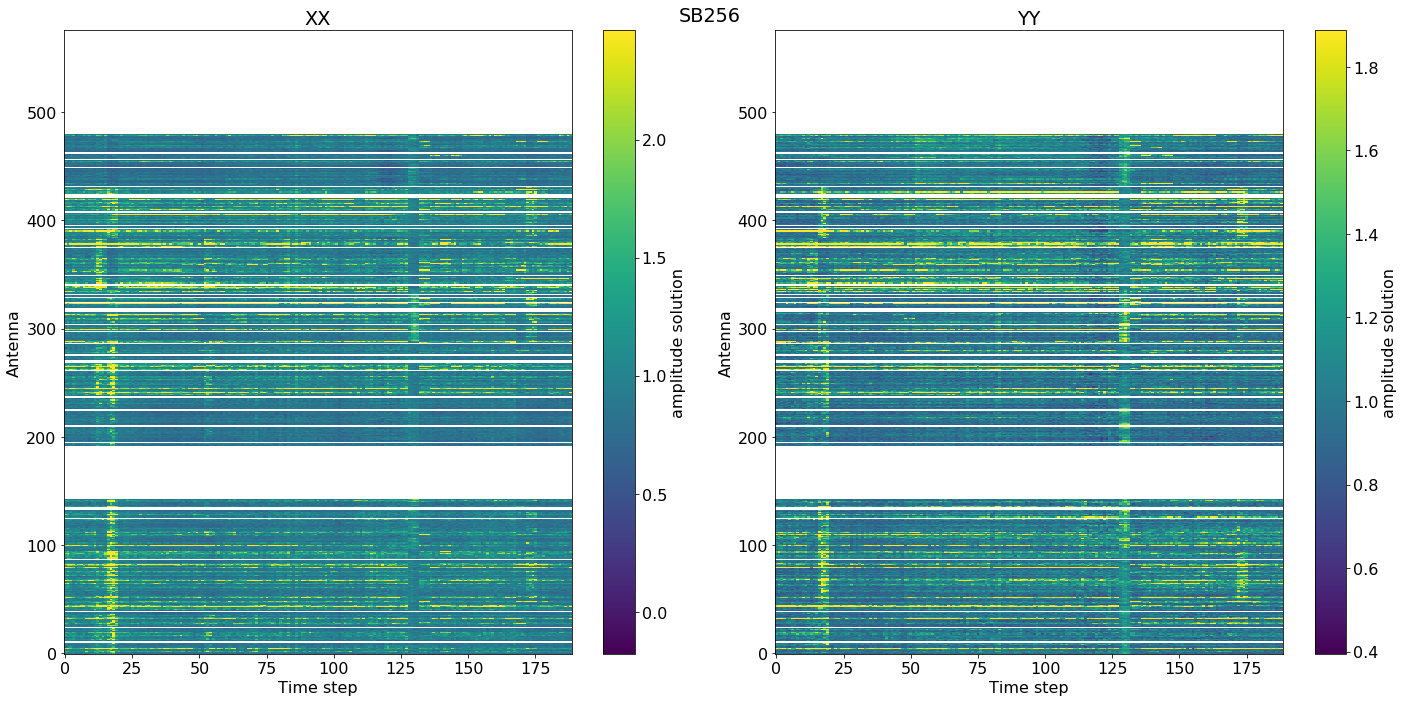

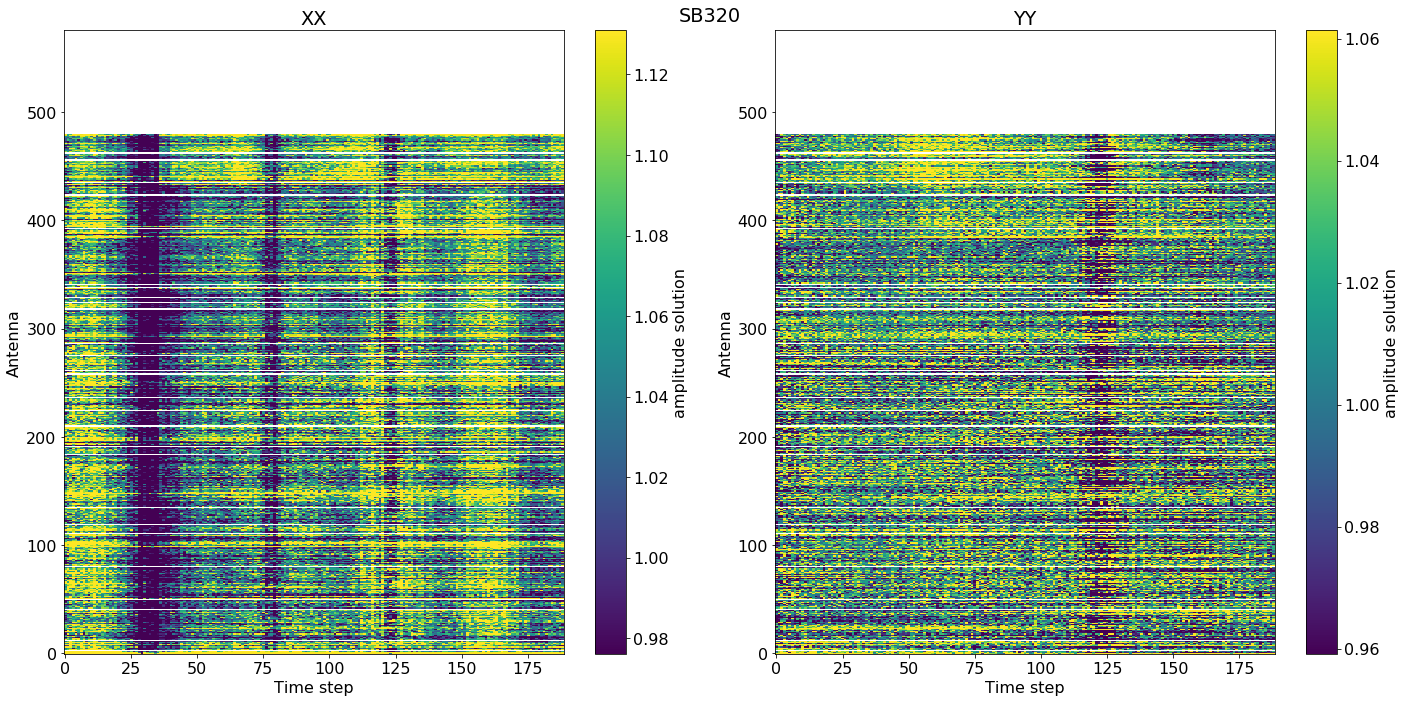

In [19]:
%matplotlib inline 
plt.rcParams["font.size"] = 16

sig = 1

SB="SB256"
OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"


sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/amplitude000")

plt.figure(figsize=(20,10))

_data = np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,0].T
vmin = np.nanmean(_data)-sig*np.nanstd(_data)
vmax = np.nanmean(_data)+sig*np.nanstd(_data)


plt.suptitle(SB)
plt.subplot(121)
plt.title(sol_tab.getValues()[1]["pol"][0])
plt.imshow(_data, 
        vmin=vmin,vmax=vmax,aspect="auto", origin="lower")
plt.colorbar(label="amplitude solution")
plt.ylabel("Antenna")
plt.xlabel("Time step")

_data= np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,3].T
vmin = np.nanmean(_data)-sig*np.nanstd(_data)
vmax = np.nanmean(_data)+sig*np.nanstd(_data)

plt.subplot(122)
plt.title(sol_tab.getValues()[1]["pol"][3])
plt.imshow(_data, 
           vmin=vmin,vmax=vmax,aspect="auto", origin="lower")
plt.colorbar(label="amplitude solution")
plt.ylabel("Antenna")
plt.xlabel("Time step")
plt.tight_layout()


SB="SB320"
OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"

sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/amplitude000")

plt.figure(figsize=(20,10))

_data = np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,0].T
vmin = np.nanmean(_data)-sig*np.nanstd(_data)
vmax = np.nanmean(_data)+sig*np.nanstd(_data)

plt.suptitle(SB)
plt.subplot(121)
plt.title(sol_tab.getValues()[1]["pol"][0])
plt.imshow(_data, 
           vmin=vmin,vmax=vmax,aspect="auto", origin="lower")
plt.colorbar(label="amplitude solution")
plt.ylabel("Antenna")
plt.xlabel("Time step")

_data = np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,3].T
vmin = np.nanmean(_data)-sig*np.nanstd(_data)
vmax = np.nanmean(_data)+sig*np.nanstd(_data)

plt.subplot(122)
plt.title(sol_tab.getValues()[1]["pol"][3])
plt.imshow(_data, 
           vmin=vmin,vmax=vmax,aspect="auto", origin="lower")
plt.colorbar(label="amplitude solution")
plt.ylabel("Antenna")
plt.xlabel("Time step")
plt.tight_layout()


/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


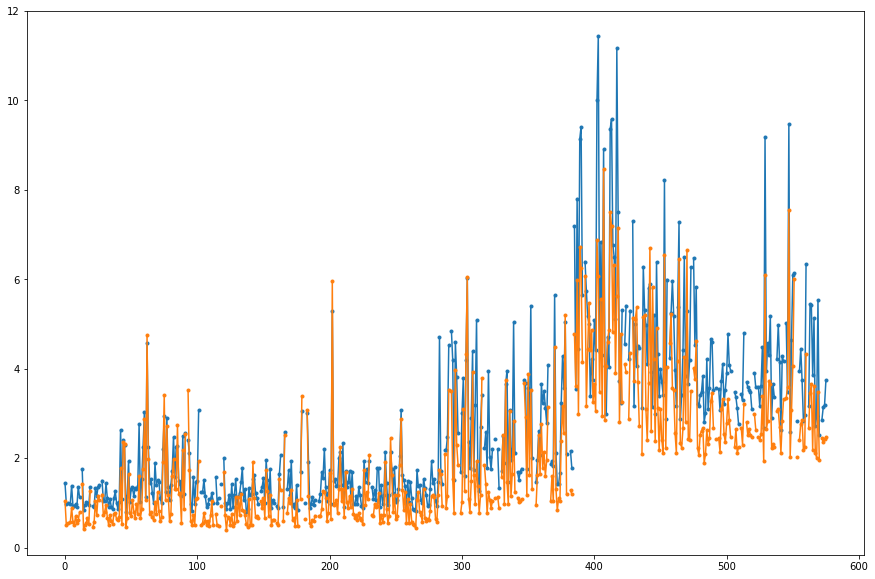

In [6]:
%matplotlib inline 
# plt.clf()
# plt.close()

SB="SB304"
OBS="202007231100"
SLICE="2020-07-23T13:15:00-13:18:10"


sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/amplitude000")

plt.figure(figsize=(15,10))
plt.plot(np.nanmean(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,0],axis=0), ".-")
plt.plot(np.nanmean(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,3],axis=0), ".-")
# plt.ylim([0,4])
plt.show()

In [34]:
np.arange(0,576)[np.isnan(np.nanmean(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,3],axis=0))]

/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


array([ 32, 138, 145, 167, 181, 182, 183, 188, 191, 231, 232, 286, 324,
       329, 341, 366, 370, 381, 384, 425, 428, 436, 491, 497, 499, 504,
       505, 510, 537, 552, 554, 561, 571])

/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


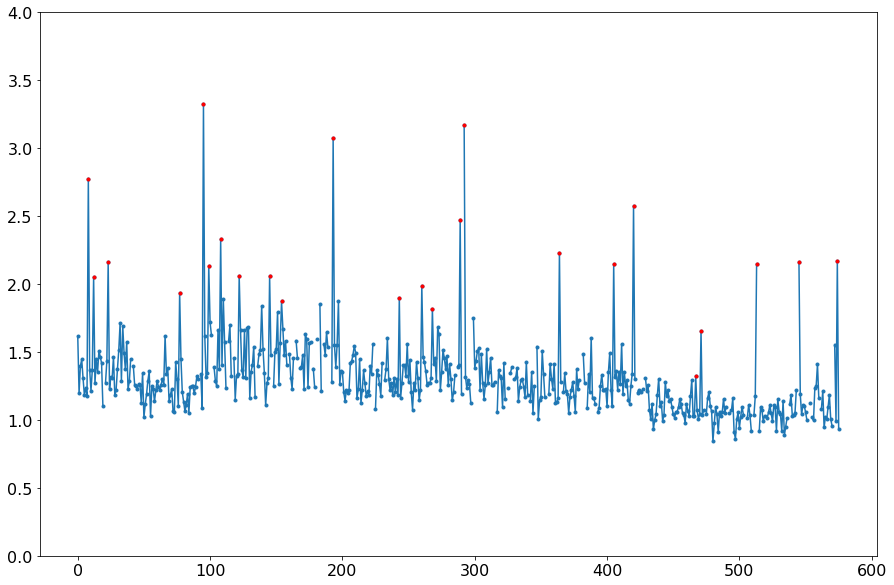

In [61]:
def mad(data, axis=None):
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

tot_sum = np.nanmean(np.nanmean(sol_tab.getValues()[0], axis=(1,3))[:,:,0],axis=0)

other_out = np.array([])

for station in np.arange(1,13):
        
        station_index = np.arange(0,48)+48*(station-1)

        other_out = np.append(other_out, 
                              np.abs(tot_sum[station_index] \
                                     - np.nanmedian(tot_sum[station_index])) \
                              > 2*np.nanstd(tot_sum[station_index]))
        
outliers = np.array(other_out, dtype=bool)

plt.figure(figsize=(15,10))
plt.plot(np.arange(0,576), tot_sum, ".-")
plt.plot(np.arange(0,576)[outliers],tot_sum[outliers], ".", c="r")

plt.ylim([0,4])

plt.show()

In [183]:
print len(np.append(np.arange(0,576)[np.isnan(tot_sum)], np.arange(0,576)[outliers]))

30


In [29]:
station=12

",".join(np.array(["[{},{}]".format(sol_tab.getValues()[1]["ant"][(station-1)*48],
                                    sol_tab.getValues()[1]["ant"][i]) \
for i in np.arange(0,48)+48*(station-1)])[1:])

'[A12_528,A12_529],[A12_528,A12_530],[A12_528,A12_531],[A12_528,A12_532],[A12_528,A12_533],[A12_528,A12_534],[A12_528,A12_535],[A12_528,A12_536],[A12_528,A12_537],[A12_528,A12_538],[A12_528,A12_539],[A12_528,A12_540],[A12_528,A12_541],[A12_528,A12_542],[A12_528,A12_543],[A12_528,A12_544],[A12_528,A12_545],[A12_528,A12_546],[A12_528,A12_547],[A12_528,A12_548],[A12_528,A12_549],[A12_528,A12_550],[A12_528,A12_551],[A12_528,A12_552],[A12_528,A12_553],[A12_528,A12_554],[A12_528,A12_555],[A12_528,A12_556],[A12_528,A12_557],[A12_528,A12_558],[A12_528,A12_559],[A12_528,A12_560],[A12_528,A12_561],[A12_528,A12_562],[A12_528,A12_563],[A12_528,A12_564],[A12_528,A12_565],[A12_528,A12_566],[A12_528,A12_567],[A12_528,A12_568],[A12_528,A12_569],[A12_528,A12_570],[A12_528,A12_571],[A12_528,A12_572],[A12_528,A12_573],[A12_528,A12_574],[A12_528,A12_575]'

In [157]:
station  = 12
station_index = np.arange(0,48)+48*(station-1)
print np.std(tot_sum[station_index])
np.abs(tot_sum[station_index] - np.nanmedian(tot_sum[station_index])) \
                              > 2*np.nanstd(tot_sum[station_index])

nan


/home/mkuiack1/env/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

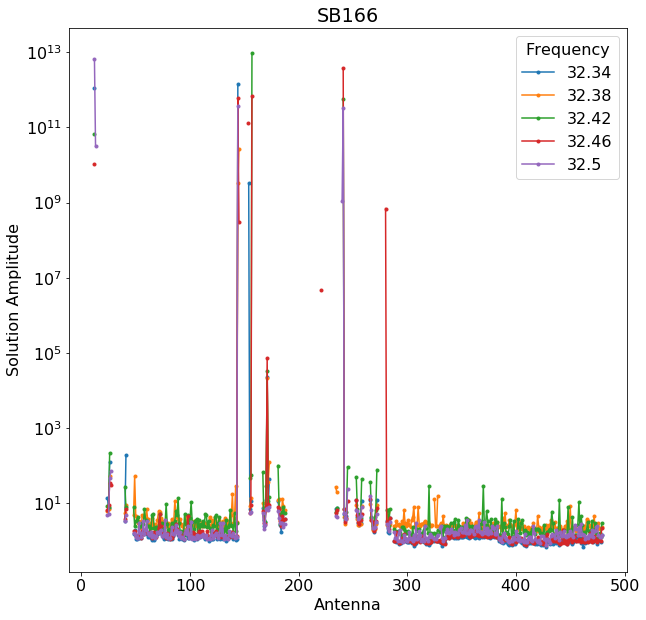

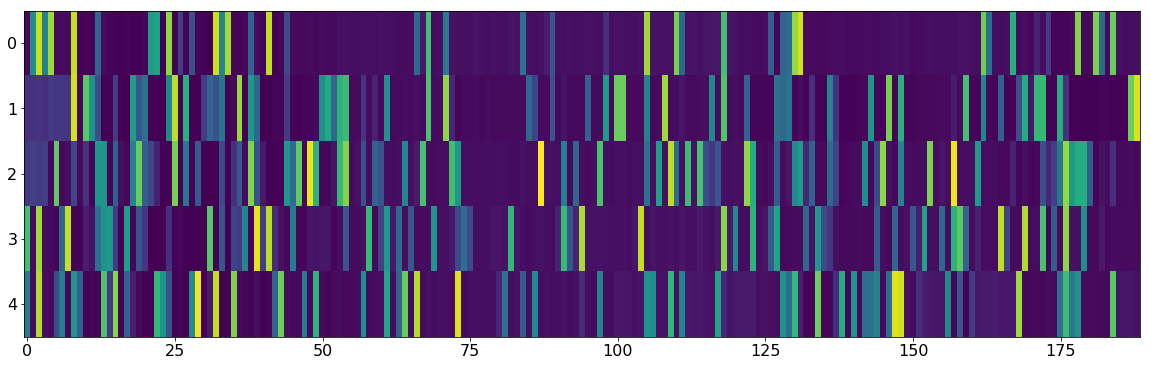

In [35]:
# %matplotlib notebook
plt.clf()
plt.close()

SB="SB166"

OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"

sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/amplitude000")

# for _SB in all_SBs:

plt.figure(figsize=(10,10))
plt.title(SB)
for i in range(len(sol_tab.getValues()[1]["freq"])):

    plt.plot(np.mean(sol_tab.getValues()[0], axis=(0,3,4))[i,:],".-", 
             label=round(sol_tab.getValues()[1]["freq"][i]/1e6, 2))

plt.ylabel("Solution Amplitude")
plt.xlabel("Antenna")
plt.legend(title="Frequency")
plt.yscale("log")
plt.show()



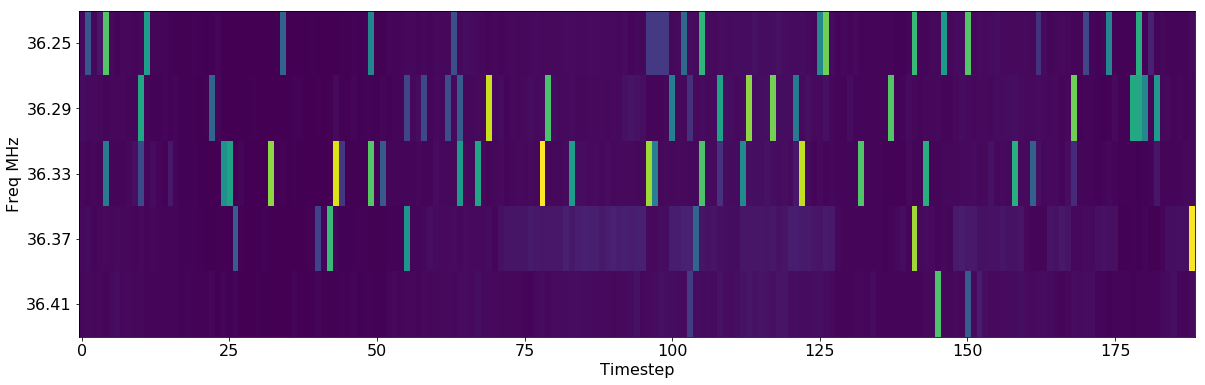

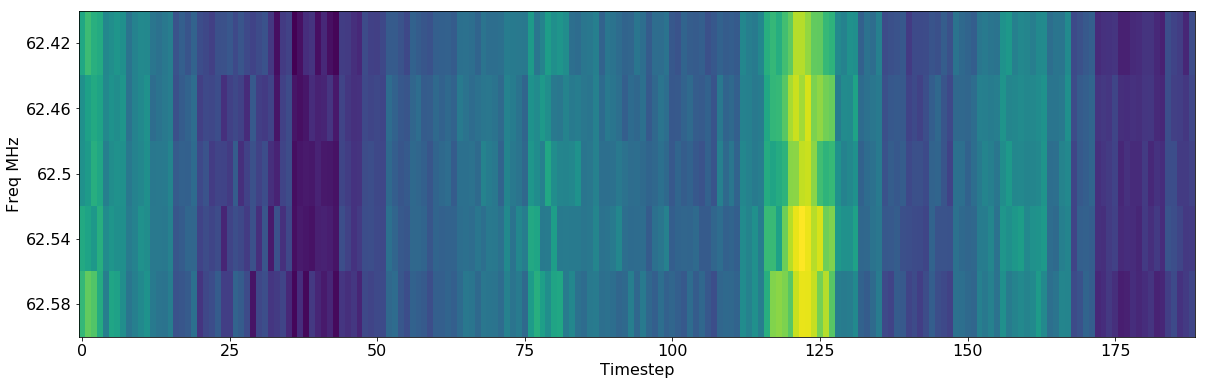

In [86]:
SB="SB186"

OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"

sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/amplitude000")

plt.figure(figsize=(20,6))
plt.imshow(np.log(np.nanmean(sol_tab.getValues()[0], axis=(2,3,4))[:,:].T), aspect="auto")
plt.yticks(range(len(sol_tab.freq)), np.array(sol_tab.freq/1e6).round(2))
plt.ylabel("Freq MHz")
plt.xlabel("Timestep")
plt.show()
SB="SB320"

OBS="202009240800"
SLICE="2020-09-24T11:15:00-11:18:10"

sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/amplitude000")

plt.figure(figsize=(20,6))
plt.imshow(np.log(np.nanmean(sol_tab.getValues()[0], axis=(2,3,4))[:,:].T), aspect="auto")
plt.yticks(range(len(sol_tab.freq)), np.array(sol_tab.freq/1e6).round(2))
plt.ylabel("Freq MHz")
plt.xlabel("Timestep")
plt.show()

[0, 1, 2, 3, 4]

array([46.41, 46.45, 46.48, 46.52, 46.56])

/home/mkuiack1/env/lib/python2.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/mkuiack1/env/lib/python2.7/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/mkuiack1/env/lib/python2.7/site-packages/matplotlib/image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/mkuiack1/env/lib/python2.7/site-packages/matplotlib/image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/mkuiack1/env/lib/python2.7/site-packages/matplotlib/colors.py:919: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/mkuiack1/env/lib/python2.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


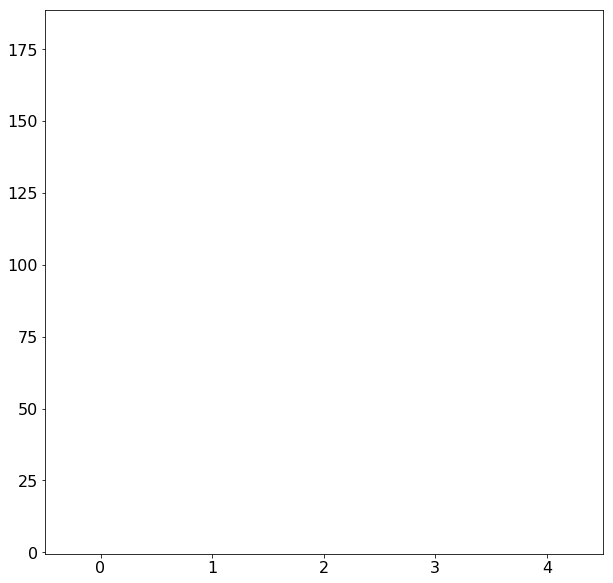

In [26]:
# sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
#                    address="sol000/amplitude000")
plt.figure(figsize=(10,10))
plt.imshow(np.mean(sol_tab.getValues()[0], axis=(2,3,4)), origin="lower", aspect="auto" )   

/home/mkuiack1/env/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


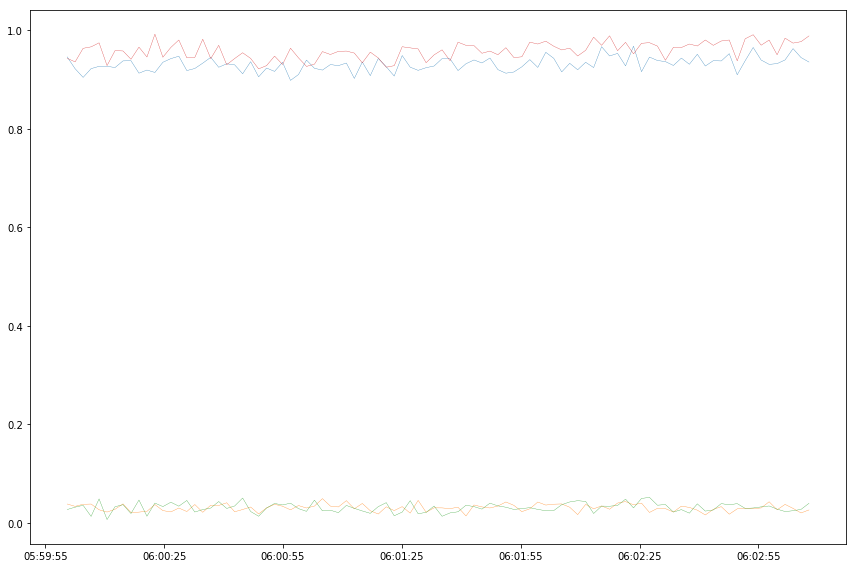

In [10]:

SB="SB281"
OBS="202005100330"
SLICE="2020-05-10T06:00:00-06:03:10"


plt.figure(figsize=(12,8))


sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                   address="sol000/amplitude000")

soldata = sol_tab.getValues()[0]
soltime = sol_tab.getValues()[1]["time"]
np.shape(soldata)



plt.plot(Time(soltime*u.s, format='mjd').datetime, 
              np.mean(soldata[:,:,200,0], axis=1), lw=0.3)

plt.tight_layout()
plt.show()




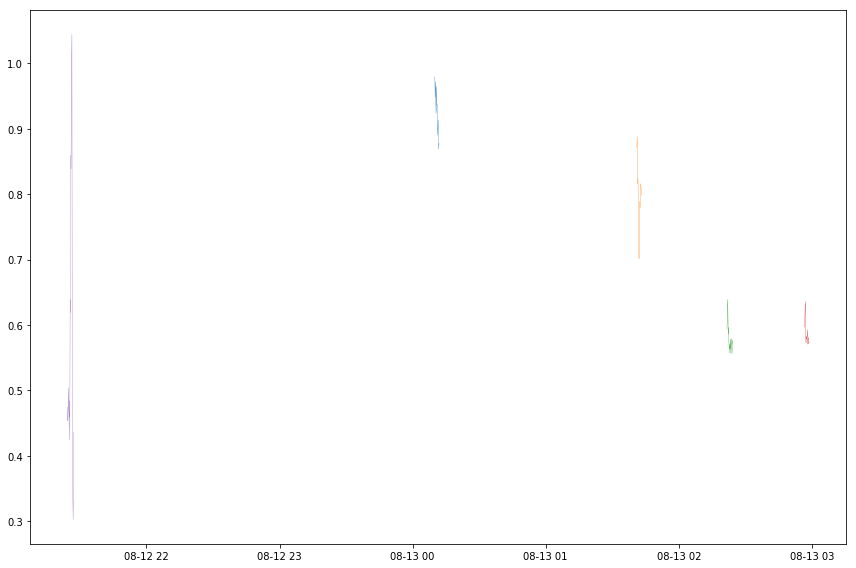

In [12]:

SB="SB281"
OBS="202005100330"
SLICE="2020-05-10T06:00:00-06:03:10"


plt.figure(figsize=(12,8))
for _obs in OBS:

    sol_tab = h5parm.openSoltab("/opt/Archive/{}/{}_all/{}-{}.ms/dde_instrument.h5".format(OBS,SLICE,SB,SLICE),
                       address="sol000/amplitude000")

    soldata = sol_tab.getValues()[0]
    soltime = sol_tab.getValues()[1]["time"]
    np.shape(soldata)



#     plt.figure(figsize=(10, 8))
    # plt.subplot(projection="polar")

   
#     for ant in np.arange(0,576):

    _x = plt.plot(Time(soltime*u.s, format='mjd').datetime, 
                  np.mean(soldata[:,:,200,0], axis=1), lw=0.3)

plt.tight_layout()
plt.show()

'A12_575'